<a href="https://colab.research.google.com/github/GreNinja47/Data-Analysis-/blob/main/Credit_Card_Loan_Reimbursement_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [ ]:
# Reading the application dataset file

df=pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [ ]:
# Examining the shape of the application datset

df.shape

(307511, 122)

In [ ]:
# Examining the columns of application datset

df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# Describing the application datset

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [ ]:
# Finding the unqiue values of columns to have a rough idea if the given columns are categorical, binary or numerical

df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_18                2
FLAG_DOCUMENT_14                2
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
                            ...  
DAYS_REGISTRATION           15688
DAYS_BIRTH                  17460
EXT_SOURCE_1               114584
EXT_SOURCE_2               119831
SK_ID_CURR                 307511
Length: 122, dtype: int64

In [ ]:
# Locating the columns having null values

df.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tru

In [ ]:
# Deriving the Age from DAYS_BIRTH

df["AGE"] = df.DAYS_BIRTH.apply(lambda x :round(abs(x)/365),0)
df["AGE"]
df["AGE"] = pd.to_numeric(df["AGE"])
df["AGE"]

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: AGE, Length: 307511, dtype: int64

In [ ]:
# Locating the number of null values columns having more than 30%

col=df.isnull().sum()
col=col[col.values>(0.3*len(col))]
len(col)

64

In [ ]:
# Number of Nulls values

df.isnull().values.sum()

9152465

##### Insight: There are 64 columns with null values more than 30% and total of 9152465 null values in the Application data set

In [ ]:
# defining to remove null values

def removeNulls(dataframe, axis=1,percent=0.3):
    df=dataframe.copy()
    ishape=df.shape
    if axis==0:
        rownames=df.transpose().isnull().sum()
        rownames=list(rownames[rownames.values>percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True)
        print("\n Number of rows dropped\t: ",len(rownames))
    else:
        colnames=(df.isnull().sum()/len(df))
        colnames=list(colnames[colnames.values >= percent].index)
        df.drop(labels=colnames,axis=1 ,inplace=True)
        print("\n Number of colnames dropped\t: ",len(colnames))
    print("\n Old dataset rows,columns",ishape,"\n New dataset rows,columns",df.shape)
    return df

In [ ]:
df=removeNulls(df,axis =1,percent=0.3)


 Number of colnames dropped	:  50

 Old dataset rows,columns (307511, 123) 
 New dataset rows,columns (307511, 73)


In [ ]:
df=removeNulls(df,axis =0,percent=0.3)


 Number of rows dropped	:  0

 Old dataset rows,columns (307511, 73) 
 New dataset rows,columns (307511, 73)


In [ ]:
unique=df.nunique()
unique=unique[unique.values==1]

In [ ]:
df.drop(labels=list(unique.index),axis=1 ,inplace=True)
print("So now we are left with",df.shape,"rows & columns.")

So now we are left with (307511, 73) rows & columns.


In [ ]:
# replacing the missing values with median value

values=df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [ ]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [ ]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [ ]:
df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 73)

In [ ]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)


In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,-259,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,46
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33


In [ ]:
#Binning
bins = [0,25000,50000,75000,100000]
group_name = ['Bad', 'Average', "Good", 'Excellent']

df["Gross_Estimation_AMT_ANNUITY"]=pd.cut(df["AMT_ANNUITY"],bins,labels=group_name)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,Gross_Estimation_AMT_ANNUITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26,Bad
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,Average
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,Bad
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,-259,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,46,Bad
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26,Average
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,41,Average
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,Bad


In [ ]:
df["AMT_INCOME_TOTAL"].describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
slots = ['0-100000', '100000-200000','200000-300000', '300000-400000','400000-500000','500000-600000','600000-700000','700000-800000',
        '800000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

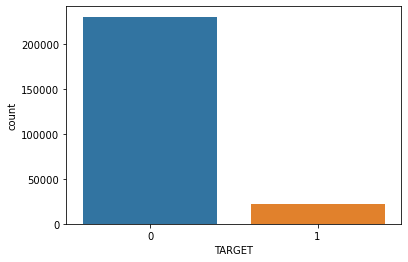

In [ ]:
Target_count= sns.countplot("TARGET",data =df)

#### Dividing the dataset into two different dataset of  target=0(non_defaulter) and target=1(defaulter)

In [ ]:
non_defaulter= df[df.TARGET==0]
defaulter= df[df.TARGET==1]

In [ ]:
non_defaulter.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 45 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    230302 non-null  int64   
 1   TARGET                        230302 non-null  int64   
 2   NAME_CONTRACT_TYPE            230302 non-null  object  
 3   CODE_GENDER                   230302 non-null  object  
 4   FLAG_OWN_CAR                  230302 non-null  object  
 5   FLAG_OWN_REALTY               230302 non-null  object  
 6   CNT_CHILDREN                  230302 non-null  int64   
 7   AMT_INCOME_TOTAL              230302 non-null  float64 
 8   AMT_CREDIT                    230302 non-null  float64 
 9   AMT_ANNUITY                   230302 non-null  float64 
 10  AMT_GOODS_PRICE               230065 non-null  float64 
 11  NAME_TYPE_SUITE               229267 non-null  object  
 12  NAME_INCOME_TYPE              

In [ ]:
defaulter.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21835 entries, 0 to 307509
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   SK_ID_CURR                    21835 non-null  int64   
 1   TARGET                        21835 non-null  int64   
 2   NAME_CONTRACT_TYPE            21835 non-null  object  
 3   CODE_GENDER                   21835 non-null  object  
 4   FLAG_OWN_CAR                  21835 non-null  object  
 5   FLAG_OWN_REALTY               21835 non-null  object  
 6   CNT_CHILDREN                  21835 non-null  int64   
 7   AMT_INCOME_TOTAL              21835 non-null  float64 
 8   AMT_CREDIT                    21835 non-null  float64 
 9   AMT_ANNUITY                   21835 non-null  float64 
 10  AMT_GOODS_PRICE               21816 non-null  float64 
 11  NAME_TYPE_SUITE               21774 non-null  object  
 12  NAME_INCOME_TYPE              21835 non-null 

#### Locating the defaulters who are less likely to pay the loans

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Univariate_defaulter_Num_1_df = defaulter.select_dtypes(include=numerics)
Univariate_defaulter_Num_1_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26
26,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573.0,-1827,9,0,0,0,0,0,0,0.548477,0.190706,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,51
40,100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,-1182.0,-1029,9,0,0,0,0,0,0,0.306841,0.320163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,48
42,100049,1,0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384,-3597,-45.0,-4409,11,0,0,0,0,0,0,0.674203,0.399676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,37
94,100112,1,0,315000.0,953460.0,64107.0,900000.0,0.030755,-10199,-2015,-4802.0,-1038,13,0,0,0,0,1,1,0.432340,0.077499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,1,207000.0,450000.0,32746.5,450000.0,0.020246,-9918,-3048,-8507.0,-2580,16,0,0,0,0,0,0,0.329708,0.360613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27
307475,456215,1,1,144000.0,1303200.0,46809.0,1125000.0,0.007330,-13416,-2405,-500.0,-4704,13,0,0,0,0,0,0,0.583214,0.424130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,37
307481,456225,1,0,225000.0,297000.0,19975.5,297000.0,0.008575,-20644,-3147,-8921.0,-3832,15,0,0,0,0,0,0,0.713524,0.511892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,57
307489,456233,1,0,225000.0,521280.0,23089.5,450000.0,0.014464,-16471,-286,-8291.0,-9,5,0,0,0,0,0,0,0.615261,0.397946,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,45


In [ ]:
categorical = ["object"]
Univariate_defaulter_Cat_1_df =defaulter.select_dtypes(include=categorical)
Univariate_defaulter_Cat_1_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
26,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,MONDAY,Business Entity Type 3
40,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3
42,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,THURSDAY,Self-employed
94,Cash loans,M,Y,Y,Family,Commercial associate,Incomplete higher,Single / not married,With parents,SUNDAY,Industry: type 4
...,...,...,...,...,...,...,...,...,...,...,...
307448,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,MONDAY,Business Entity Type 3
307475,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,THURSDAY,Construction
307481,Cash loans,M,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Business Entity Type 3
307489,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,FRIDAY,Business Entity Type 3


#### Univariate Analysis

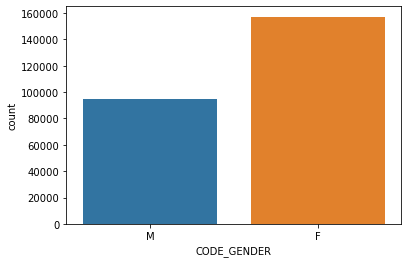

In [ ]:
# Plotting the Males and femals in the entire polulation
Gender1= sns.countplot("CODE_GENDER",data =df)

In [ ]:
#Locating the percentage of males and females in the defaulter list

Gender2=round((Univariate_defaulter_Cat_1_df["CODE_GENDER"].value_counts()/df["CODE_GENDER"].value_counts())*100,2)
Gender2 = pd.DataFrame(Gender2)
Gender2.reset_index(level=0, inplace=True)
Gender2.rename(columns=  {"index": "CODE_GENDER", "CODE_GENDER":"Default_Percentage"}, inplace = True)
Gender2

,CODE_GENDER,Default_Percentage
0,F,7.58
1,M,10.44


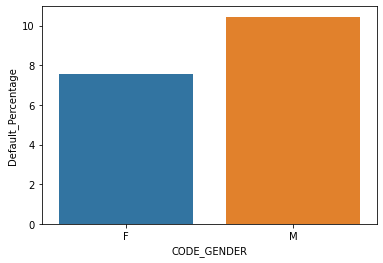

In [ ]:
#plot to show the number male and female on Target =1
Gender3= sns.barplot(x="CODE_GENDER",y="Default_Percentage",data=Gender2)

####  Insight: The Males have 10.44 rating, that is more chance of becoming the defaulters whereas Females have 7.58 rating, comparatively less chance of becoming the defaulters

In [ ]:
# Plotting the NAME_FAMILY_STATUS columns to gather the insight on fradulance `

In [ ]:
df.NAME_FAMILY_STATUS.nunique()

6

In [ ]:
NAME_FAMILY_STATUS1 = df.NAME_FAMILY_STATUS.value_counts()
NAME_FAMILY_STATUS1 = pd.DataFrame(NAME_FAMILY_STATUS1)
NAME_FAMILY_STATUS1.reset_index(level=0, inplace=True)
NAME_FAMILY_STATUS1.rename(columns=  {"index": "NAME_FAMILY_STATUS", "NAME_FAMILY_STATUS":"number"}, inplace = True)
NAME_FAMILY_STATUS1

,NAME_FAMILY_STATUS,number
0,Married,163914
1,Single / not married,39316
2,Civil marriage,26197
3,Separated,16000
4,Widow,6708
5,Unknown,2


[Text(0, 0, 'Married'),
 Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Unknown')]

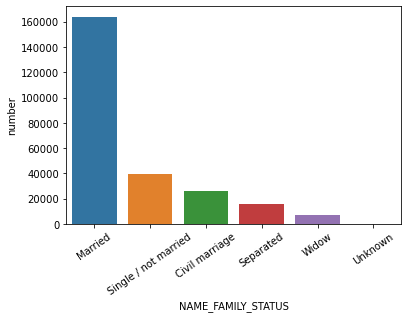

In [ ]:
# Plotting the family status

NAME_FAMILY_STATUS2 = sns.barplot(x="NAME_FAMILY_STATUS",y="number",data =NAME_FAMILY_STATUS1)

NAME_FAMILY_STATUS2.set_xticklabels(NAME_FAMILY_STATUS2.get_xticklabels(),rotation=35)

In [ ]:
# Locating the percentage of family status in the defaulter list

NAME_FAMILY_STATUS3=round((Univariate_defaulter_Cat_1_df["NAME_FAMILY_STATUS"].value_counts()/df["NAME_FAMILY_STATUS"].value_counts())*100,2)
NAME_FAMILY_STATUS3 = pd.DataFrame(NAME_FAMILY_STATUS3)
NAME_FAMILY_STATUS3.reset_index(level=0, inplace=True)
NAME_FAMILY_STATUS3.rename(columns=  {"index": "NAME_FAMILY_STATUS", "NAME_FAMILY_STATUS":"Default_Percentage"}, inplace = True)
NAME_FAMILY_STATUS3.sort_values(by='Default_Percentage', inplace=True)
NAME_FAMILY_STATUS3

,NAME_FAMILY_STATUS,Default_Percentage
5,Widow,5.98
1,Married,8.05
2,Separated,8.70
0,Civil marriage,10.44
3,Single / not married,10.48
4,Unknown,NaN


[Text(0, 0, 'Widow'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Unknown')]

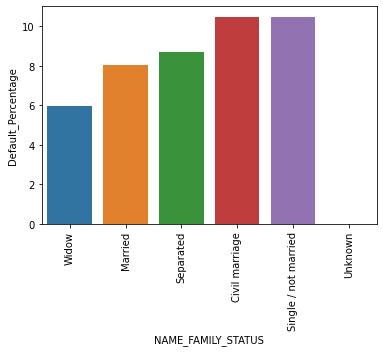

In [ ]:
# Deriving the value to locate thef

NAME_FAMILY_STATUS4= sns.barplot(x="NAME_FAMILY_STATUS",y="Default_Percentage",data=NAME_FAMILY_STATUS3)
NAME_FAMILY_STATUS4.set_xticklabels(NAME_FAMILY_STATUS4.get_xticklabels(),rotation=90)

#### Civil mariage and Singles top the list of defaulters and interestingly widows are seen as lowest to default.

In [ ]:
# Deriving the plot to check the insight on higher education, to determine the change of fradulance with education status

In [ ]:
df.NAME_EDUCATION_TYPE

0         Secondary / secondary special
1                      Higher education
2         Secondary / secondary special
3         Secondary / secondary special
4         Secondary / secondary special
                      ...              
307504    Secondary / secondary special
307506    Secondary / secondary special
307508                 Higher education
307509    Secondary / secondary special
307510                 Higher education
Name: NAME_EDUCATION_TYPE, Length: 252137, dtype: object

[Text(0, 0, 'Secondary / secondary special'),
 Text(0, 0, 'Higher education'),
 Text(0, 0, 'Incomplete higher'),
 Text(0, 0, 'Lower secondary'),
 Text(0, 0, 'Academic degree')]

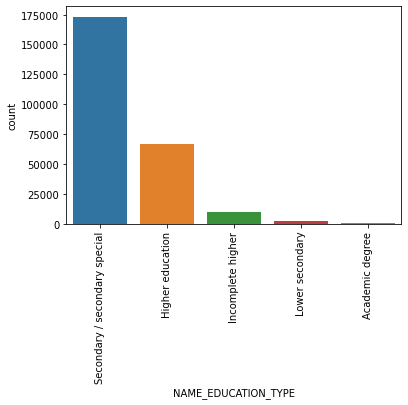

In [ ]:
# Plotting the

NAME_EDUCATION_TYPE1 = sns.countplot("NAME_EDUCATION_TYPE",data =df)
NAME_EDUCATION_TYPE1.set_xticklabels(NAME_EDUCATION_TYPE1.get_xticklabels(),rotation=90)

In [ ]:
#find the percentage education level of clients in the defaulter list

NAME_EDUCATION_TYPE1=round((Univariate_defaulter_Cat_1_df["NAME_EDUCATION_TYPE"].value_counts()/df["NAME_EDUCATION_TYPE"].value_counts())*100,2)

NAME_EDUCATION_TYPE1 = pd.DataFrame(NAME_EDUCATION_TYPE1)

NAME_EDUCATION_TYPE1.reset_index(level=0, inplace=True)
NAME_EDUCATION_TYPE1.sort_values(by=["NAME_EDUCATION_TYPE"],ascending=False,inplace=True)

NAME_EDUCATION_TYPE1.rename(columns=  {"index": "NAME_EDUCATION_TYPE", "NAME_EDUCATION_TYPE":"Default_Percentage"}, inplace = True)


NAME_EDUCATION_TYPE1

,NAME_EDUCATION_TYPE,Default_Percentage
3,Lower secondary,13.77
0,Secondary / secondary special,9.81
2,Incomplete higher,8.69
1,Higher education,5.50
4,Academic degree,2.17


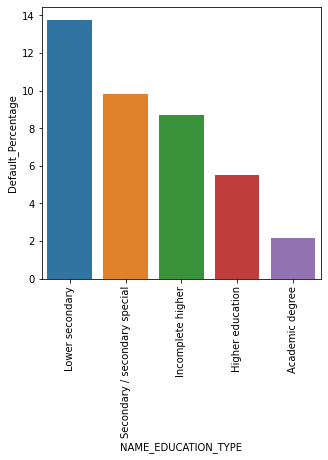

In [ ]:
#plot to show the education type of each client vs. Target variable. Here, Target =1

f, ax = plt.subplots(figsize=(5,5))
NAME_EDUCATION_TYPE2=sns.barplot(x="NAME_EDUCATION_TYPE",y="Default_Percentage",data=NAME_EDUCATION_TYPE1,order=NAME_EDUCATION_TYPE1['NAME_EDUCATION_TYPE'])

NAME_EDUCATION_TYPE2.set_xticklabels(NAME_EDUCATION_TYPE2.get_xticklabels(), rotation=90)
NAME_EDUCATION_TYPE2

#### Insight: The lower the education level leads to lesser the chances in repaying the loan and more the chance of defaulting

In [ ]:
df.AMT_INCOME_TOTAL

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307504    153000.0
307506    157500.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 252137, dtype: float64

In [ ]:
AMT_INCOME_TOTAL1=round((Univariate_defaulter_Cat_1_df["ORGANIZATION_TYPE"].value_counts()/df["ORGANIZATION_TYPE"].value_counts())*100,2)

AMT_INCOME_TOTAL1 = pd.DataFrame(AMT_INCOME_TOTAL1)

AMT_INCOME_TOTAL1.reset_index(level=0, inplace=True)
AMT_INCOME_TOTAL1.sort_values(by=["ORGANIZATION_TYPE"],ascending=False,inplace=True)

AMT_INCOME_TOTAL1.rename(columns=  {"index": "ORGANIZATION_TYPE",
                     "ORGANIZATION_TYPE":"Default_Percentage"},
                                  inplace = True)

AMT_INCOME_TOTAL1

,ORGANIZATION_TYPE,Default_Percentage
54,Transport: type 3,15.75
18,Industry: type 13,13.43
25,Industry: type 8,12.50
38,Restaurant,11.71
7,Construction,11.68
6,Cleaning,11.15
14,Industry: type 1,11.07
20,Industry: type 3,10.62
36,Realtor,10.61
1,Agriculture,10.47


C:\Users\vakumar\Anaconda3\lib\site-packages\seaborn\categorical.py:411: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


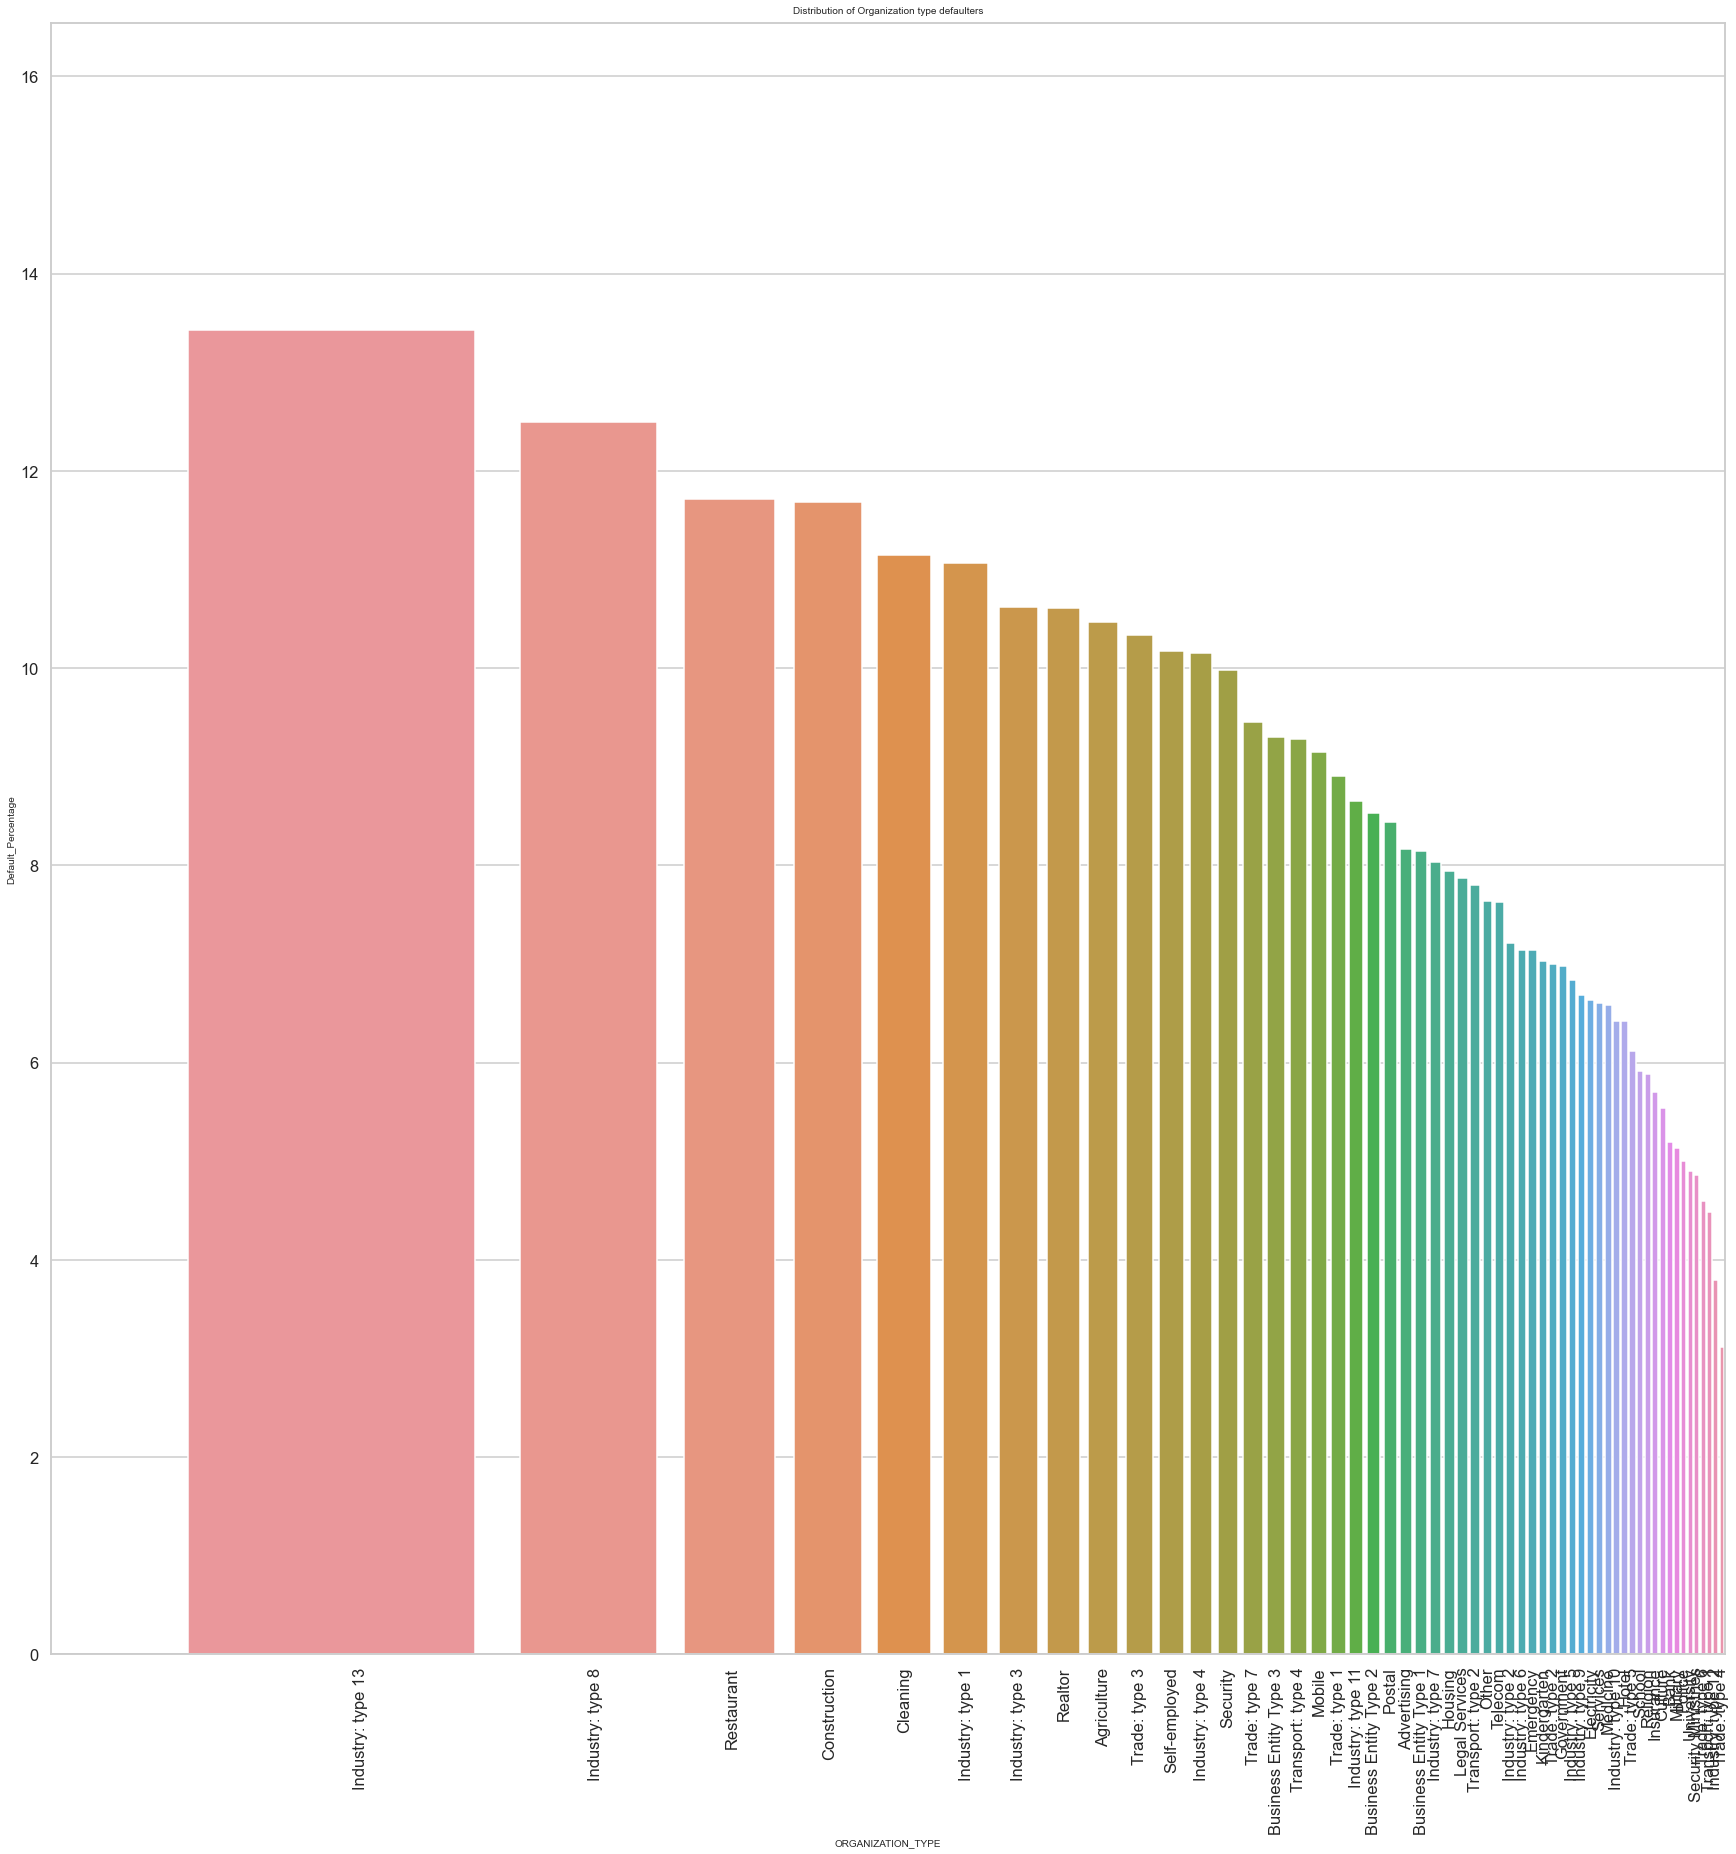

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(30,30))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 10

plt.title("Distribution of Organization type defaulters")

plt.xticks(rotation=90)
plt.xscale('log')

sns.barplot(x="ORGANIZATION_TYPE",y="Default_Percentage",data=AMT_INCOME_TOTAL1,order=AMT_INCOME_TOTAL1['ORGANIZATION_TYPE'])
plt.show()

#### Insight: Transport Type 3 first and later succeeded with Industry Type 8 are considered to have more defaulters  other Organisation Type employees

####  BIVARIATE ANALYSIS

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Unknown')]

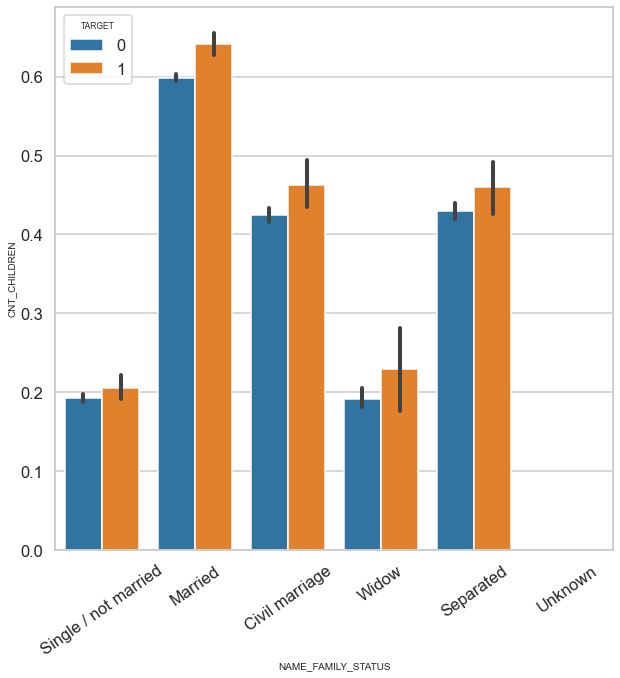

In [ ]:
# Deriving the plot on Family Status and number of childeren to get an insight of any fradulance

f, ax = plt.subplots(figsize=(10,10))
plot_1=sns.barplot("NAME_FAMILY_STATUS","CNT_CHILDREN",data=df,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=35)

#### Insight : The married people with more then 6 children have more chances of being fradulent then widow or single parents

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',

[Text(0, 0, 'House / apartment'),
 Text(0, 0, 'Rented apartment'),
 Text(0, 0, 'With parents'),
 Text(0, 0, 'Municipal apartment'),
 Text(0, 0, 'Office apartment'),
 Text(0, 0, 'Co-op apartment')]

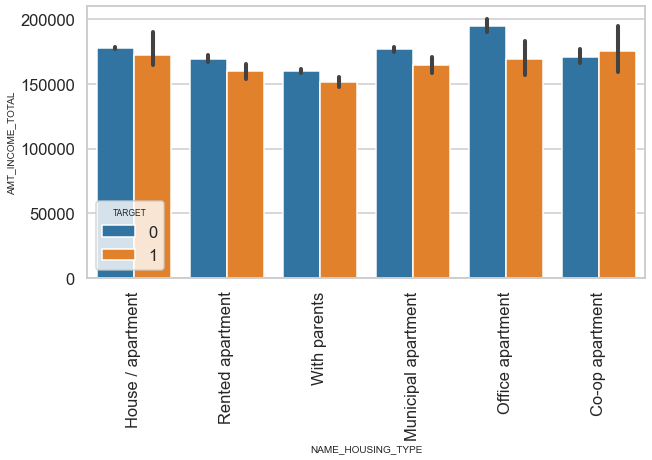

In [ ]:
# Deriving the plot on Family Status and number of childeren to get an insight of any fradulance

f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_HOUSING_TYPE","AMT_INCOME_TOTAL",data=df,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

#### Insight: The people resident in Co-op Apartment rather then living with parents has more chances of being a fradulent

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

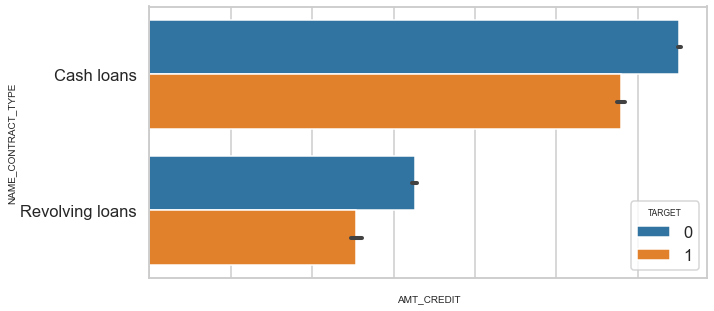

In [ ]:
# Deriving the plot on type of contract type choosen with amount of credit debt

f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("AMT_CREDIT","NAME_CONTRACT_TYPE",data=df,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

#### Insight: The people who prefer Cash loans with largest credit amount proportional has higher chance of not paying the loans

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Unknown')]

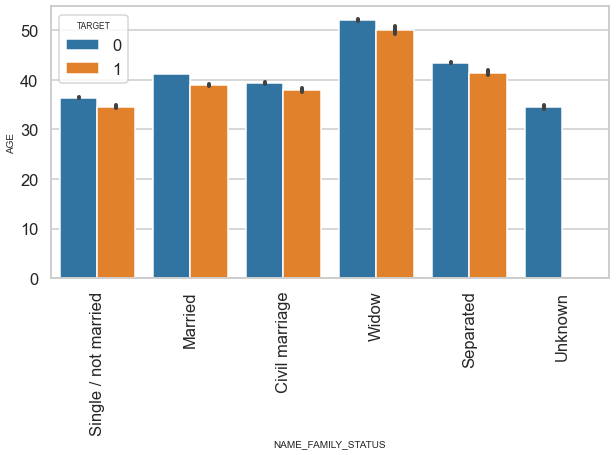

In [ ]:


f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","AGE",data=df,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

#### Insight : Widows of age above 50+ have risk of not returning the loan


#### Finding the Correlation relationship between 0 and 1

In [ ]:
non_defaulter # The dataframe of non defaulters

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,Gross_Estimation_AMT_ANNUITY,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,Average,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,Bad,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52,Average,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,Bad,500000-600000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,46,Average,400000-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,-11870,-399,-675.0,-3936,SATURDAY,11,0,0,0,0,0,0,Bank,0.501221,0.609276,9.0,3.0,9.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,33,Bad,300000-400000
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,-259,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,46,Bad,300000-400000
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26,Average,200000-300000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,41,Average,600000-700000


In [ ]:
defaulter  # The dataframe of non defaulters

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,Gross_Estimation_AMT_ANNUITY,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26,Bad,400000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,51,Average,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,48,Average,NaN
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,37,Bad,200000-300000
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0.077499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,28,Good,900000 and above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-9918,-3048,-8507.0,-2580,MONDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.329708,0.360613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27,Average,400000-500000
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.007330,-13416,-2405,-500.0,-4704,THURSDAY,13,0,0,0,0,0,0,Construction,0.583214,0.424130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,37,Average,NaN
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.008575,-20644,-3147,-8921.0,-3832,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.713524,0.511892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,57,Bad,200000-300000
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.014464,-16471,-286,-8291.0,-9,FRIDAY,5,0,0,0,0,0,0,Business Entity Type 3,0.615261,0.397946,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,45,Bad,500000-600000


In [ ]:
target0_corr=non_defaulter.iloc[0:,2:]
target1_corr=defaulter.iloc[0:,2:]

target0=non_defaulter.corr(method='pearson')
target1=defaulter.corr(method='pearson')


In [ ]:
target0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
SK_ID_CURR,1.000000,NaN,-0.000484,0.001415,-0.000777,-0.001179,-0.000345,-0.000094,-0.001016,-0.000005,0.000269,0.000202,-0.000275,-0.000699,0.001145,0.003289,-0.003709,-0.001431,0.000923,0.001327,0.001012,0.000647,0.002262,0.000560,0.003557,-0.002060,-0.001751,0.000813,0.000580,0.000356,0.003899,0.001045
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000484,NaN,1.000000,-0.009826,-0.018704,-0.007612,-0.022286,-0.030352,0.242462,0.063036,0.162900,-0.117746,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,-0.015157,0.019388,0.003419,0.019062,0.002384,-0.001755,0.000170,-0.001397,-0.021331,-0.003161,-0.032376,-0.242343
AMT_INCOME_TOTAL,0.001415,NaN,-0.009826,1.000000,0.326155,0.400752,0.333312,0.169306,-0.045543,-0.030102,0.034508,-0.026462,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.052724,-0.030661,-0.027914,-0.030477,-0.027415,0.001375,0.009130,0.006816,0.057193,0.012069,0.025002,0.045514
AMT_CREDIT,-0.000777,NaN,-0.018704,0.326155,1.000000,0.762103,0.986726,0.103876,-0.152659,-0.087500,-0.015180,-0.034914,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,0.056919,-0.003803,-0.022223,-0.003770,-0.024255,-0.004400,0.005392,-0.003026,0.052167,0.018479,-0.051741,0.152643
AMT_ANNUITY,-0.001179,NaN,-0.007612,0.400752,0.762103,1.000000,0.766932,0.122206,-0.091571,-0.052470,0.009814,-0.025990,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268,0.126979,0.046820,-0.016426,-0.023286,-0.016241,-0.024129,0.003764,0.003059,0.014125,0.034279,0.013746,-0.007369,0.091596
AMT_GOODS_PRICE,-0.000345,NaN,-0.022286,0.333312,0.986726,0.766932,1.000000,0.107026,-0.146827,-0.088638,-0.011845,-0.036697,0.049994,0.023520,0.052065,0.052349,-0.036954,-0.039259,-0.015809,0.142505,0.059217,-0.003965,-0.023455,-0.003974,-0.025079,-0.003925,0.005774,-0.002455,0.053939,0.018952,-0.054660,0.146801
REGION_POPULATION_RELATIVE,-0.000094,NaN,-0.030352,0.169306,0.103876,0.122206,0.107026,1.000000,-0.041138,0.008663,-0.059696,-0.004014,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033,0.207116,-0.013429,-0.013763,0.005047,-0.013241,0.000658,-0.001392,0.002247,-0.003707,0.081801,-0.001901,-0.001975,0.041039
DAYS_BIRTH,-0.001016,NaN,0.242462,-0.045543,-0.152659,-0.091571,-0.146827,-0.041138,1.000000,0.352662,0.299000,0.108050,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121,-0.142263,-0.174321,0.019531,0.015212,0.019128,0.015897,0.001717,0.002773,0.000385,-0.029297,-0.001681,-0.053976,-0.999584
DAYS_EMPLOYED,-0.000005,NaN,0.063036,-0.030102,-0.087500,-0.052470,-0.088638,0.008663,0.352662,1.000000,0.172102,0.086679,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665,-0.081558,-0.121417,-0.000752,0.007447,-0.000811,0.009392,-0.001317,0.002559,0.002952,-0.023439,0.005958,-0.000783,-0.352565


In [ ]:
target1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
SK_ID_CURR,1.000000,NaN,-0.006616,-0.011094,0.000820,-0.007284,0.000581,0.007684,-0.005126,0.000376,0.003792,-0.002790,0.004338,-0.004349,0.003915,0.004172,0.007732,-0.000518,-0.004294,0.006044,-0.005782,-0.005792,-0.000824,-0.005275,-0.006929,-0.013842,-0.004016,-0.003235,0.004487,-0.002640,0.011461,0.005209
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.006616,NaN,1.000000,0.001872,-0.002074,0.015653,-0.007711,-0.032019,0.176563,0.032627,0.126411,-0.089861,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,-0.000029,0.028712,0.002959,0.027955,-0.003220,-0.002160,-0.010219,-0.008425,-0.019714,-0.016997,-0.028892,-0.176366
AMT_INCOME_TOTAL,-0.011094,NaN,0.001872,1.000000,0.036484,0.043358,0.036097,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.013841,-0.005866,-0.005849,-0.005765,-0.005282,0.000506,-0.000456,-0.000003,0.003554,-0.001496,0.000634,0.008080
AMT_CREDIT,0.000820,NaN,-0.002074,0.036484,1.000000,0.748708,0.982799,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.086877,0.015835,-0.031869,0.016319,-0.035170,-0.007747,-0.003064,0.009905,0.059205,-0.014755,-0.039210,0.189458
AMT_ANNUITY,-0.007284,NaN,0.015653,0.043358,0.748708,1.000000,0.749379,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806,0.120642,0.052896,-0.000018,-0.024644,0.001216,-0.027918,0.011067,-0.002052,0.037405,0.055411,-0.005816,-0.010880,0.090384
AMT_GOODS_PRICE,0.000581,NaN,-0.007711,0.036097,0.982799,0.749379,1.000000,0.076277,-0.185578,-0.111933,-0.032070,-0.064713,0.042276,0.023552,0.039425,0.038486,-0.035628,-0.041534,-0.017099,0.137711,0.087334,0.016707,-0.027108,0.017260,-0.029623,-0.006794,-0.001185,0.011951,0.063091,-0.013539,-0.042651,0.185461
REGION_POPULATION_RELATIVE,0.007684,NaN,-0.032019,0.008476,0.069220,0.074406,0.076277,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017,0.170162,-0.013677,0.004513,0.023877,0.004907,0.015341,0.000352,-0.001767,0.006908,0.072552,-0.006391,-0.002406,0.050143
DAYS_BIRTH,-0.005126,NaN,0.176563,-0.007822,-0.189512,-0.090497,-0.185578,-0.049958,1.000000,0.307018,0.241202,0.135519,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044,-0.142909,-0.146276,-0.009064,0.011109,-0.009647,0.012546,0.013548,0.002459,0.003670,-0.027893,-0.010031,-0.082644,-0.999551
DAYS_EMPLOYED,0.000376,NaN,0.032627,-0.000039,-0.106003,-0.049032,-0.111933,-0.015758,0.307018,1.000000,0.137454,0.096559,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026,-0.094249,-0.085475,-0.030834,0.000503,-0.030778,0.000288,0.009876,-0.006105,-0.008464,-0.022732,0.019980,-0.023115,-0.306927


In [ ]:

def targets_corr(data,title):
    plt.figure(figsize=(10, 10))
    plt.rcParams['axes.titlesize'] = 30
    plt.rcParams['axes.titlepad'] = 30

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()




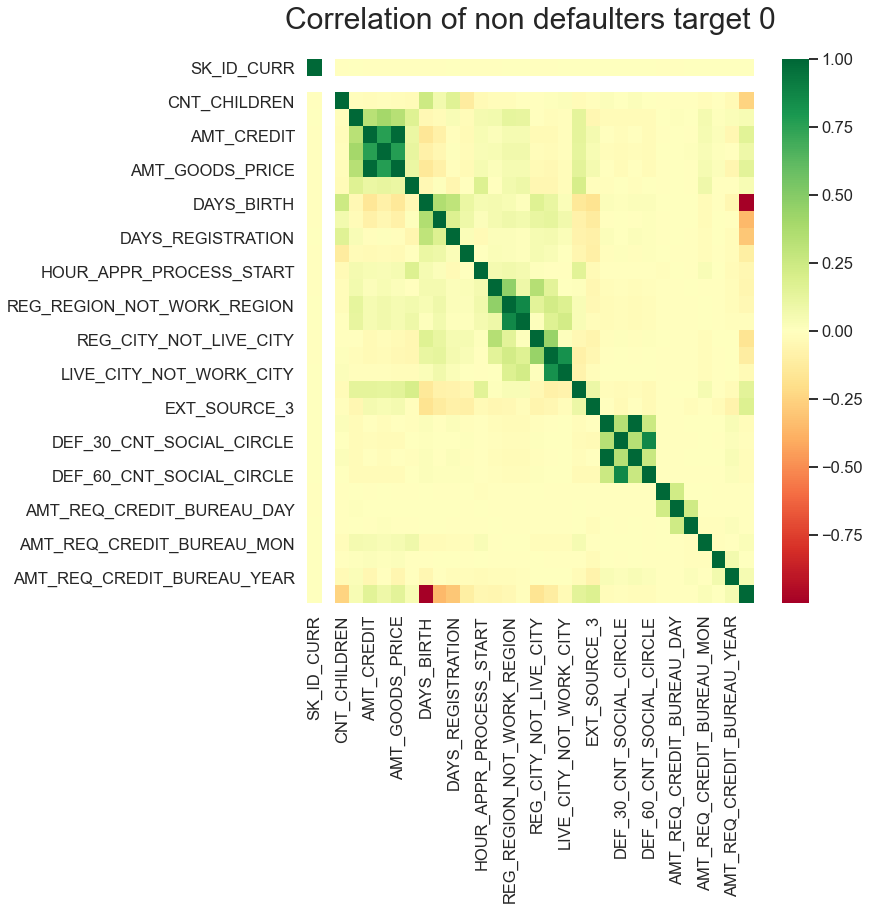

In [ ]:
targets_corr(data=target0,title='Correlation of non defaulters target 0')

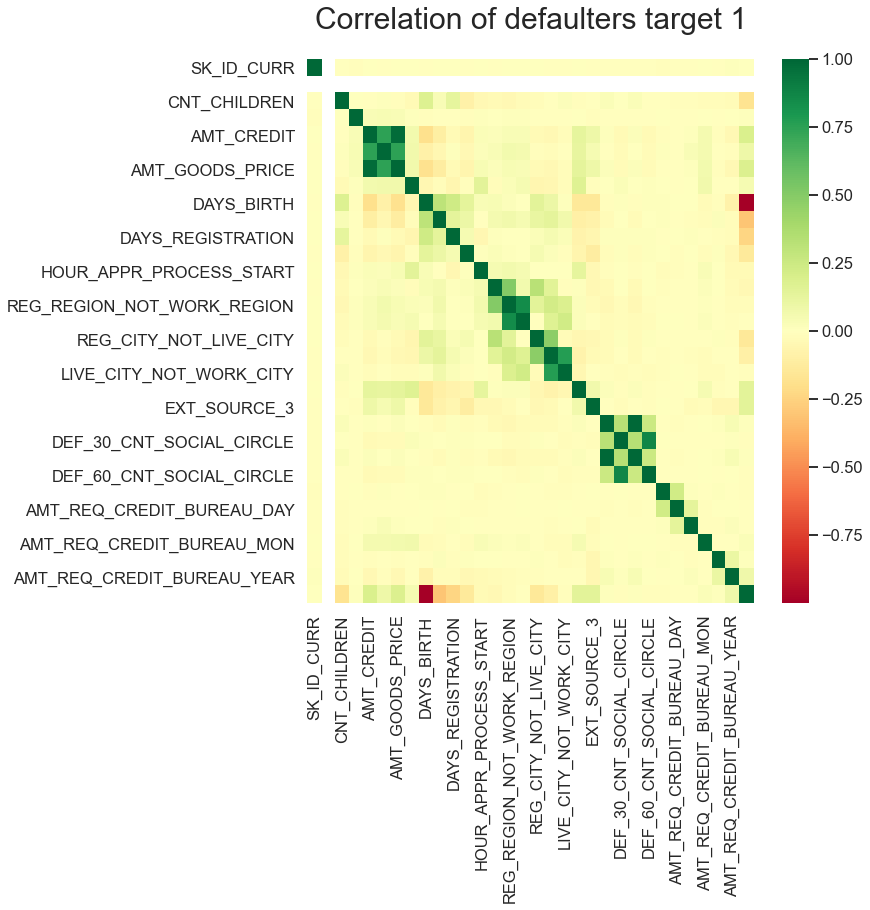

In [ ]:
targets_corr(data=target1,title='Correlation of defaulters target 1')

#### Insight: The difference in the heat map is obervered from Target 0 to Target 1, the number of children and number of credit amount increase would proportionally impact the risks of defaulting   

In [ ]:
#Reading previous.csv Data

df1 = pd.read_csv("previous_application.csv")
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [ ]:
# Looking through the previous applications columns

df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
# Describing the previous application columns

print(df1.describe())

         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03  

In [ ]:
# Finding percentage of Nan
previous_application_percent = round(100*(df1.isnull().sum()/len(df1.index)), 2)
previous_application_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [ ]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)


15

In [ ]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [ ]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

In [ ]:
# Rechecking to verify the changes applied
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
19,1173070,199178,Cash loans,45000.0,49455.0,SATURDAY,16,Y,1,Everyday expenses,Refused,-584,XNA,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,high
51,2664403,163660,Cash loans,67500.0,82611.0,SATURDAY,10,Y,1,Car repairs,Approved,-766,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
85,1981960,306707,Cash loans,225000.0,269550.0,WEDNESDAY,11,Y,1,Building a house or an annex,Refused,-13,Cash through the bank,SCOFR,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [ ]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')
new_df

In [ ]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [ ]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

**Univariate analysis**

In [ ]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(30,30))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titlepad'] = 15
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='coolwarm')

Insights:

1. The Repair section had more number of rejections for the loan approval process.
2. The Refusal to name the goal has 60% higher chance of loan rejections.
3. The Eduction section has equal percentile of loan approval and rejection
4. Paying Other loans have significantly has higher probiability of rejection aswell.
5. Repairs, Others and  Urgent needs tops the list were people are more apply for a loan.

**Bivariate analysis**

In [ ]:
# Deriving a plot to check the insight in Total income and Housing type

plt.figure(figsize=(10,10))
plt.xticks(rotation=25)
sns.barplot(data =new_df1, y='AMT_INCOME_TOTAL',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Total income and Housing type')
plt.show()


In [ ]:
# Deriving a plot to check the insight in Payment Credit and Housing type

plt.figure(figsize=(10,10))
plt.xticks(rotation=25)
sns.barplot(data =new_df1, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Payment Credit and Housing type')
plt.show()


In [ ]:
# Deriving a plot to check the insight in Children counts and Housing type

plt.figure(figsize=(10,10))
plt.xticks(rotation=25)
sns.barplot(data =new_df1, y='CNT_CHILDREN',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Children counts and Housing type')
plt.show()


Insights:

1. After the Bivariate analysis on Housing Types with Total Income, Payment Credit and childern counts we can come to the conclusion that least number of the fradualent was observed with applicants who reside with their parents.
2. The residents of CO-Op Apartment has greater chance of fradulance when the debt amount is higher in level
3. The applicants who are of residents of Office and Rental Apartment has significance higher risk of not repaying the loan who have more number of children.



### Final Verdict on CREDIT EDA


Greater risk of defaulters in loan reimbursements:

1. The Female applicant has slightly lesser risk of not replaying the loan amount when compared with Male applicant, if there is a option to provide anyone out of two then it's more reliable to go with Female applicant.

2. The lower the education level would create higher the risk of deafaulting as lack of employement or low pay would make the person less sustanable to repay the loans.

3. The married people with more then 6 children have more chances of not repaying the loan.

4. The people resident in Co-op Apartment has more chances of being a fradulent then other housing types.

4. The applicants who prefer Cash loans with largest the credit amount proportional has higher chance of not paying the loans.

5. Widows of age above 50+ have risk of not returning the loans.


Successfully repayment of loan reimbursements:
    
1. The Loan amount should be very likely given to applicants who reside with their parents.
    
2. The Bank can provide loan to Students, Businessman, Higher Education Level applicants easily without much hassle.

3. The lesser the childern and more successfull in financial has higher chance of loan repayment.

4. The Widow with less or no children has greater repayment chance then any other martial status.

5. Revolving loans has higher repayment chances then cash loans
